In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
from keras.utils import np_utils

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
)
from sklearn.model_selection import (
    train_test_split as tts,
    StratifiedKFold
)
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import type_of_target

import seaborn as sns

from Bio import SeqIO
from Bio.Seq import Seq

In [5]:
data = pd.read_csv('../data/pro_nonpro.csv')

y = data.Level
x = data.Seq

# class_maps = {
#     'NON': 0,
#     'WEAK': 1,
#     'STRONG': 2
# }
# for index, val in y.iteritems():
#     y[index] = class_maps[val]

le = LabelEncoder()

y = pd.Series(le.fit_transform(y))

maps = {
    'A': '00',
    'T': '01',
    'G': '10',
    'C': '11'
}

binary_encodings = []
for index, val in x.iteritems():
    binary_encodings.append('1' + ''.join([maps[i] for i in val]))

x = pd.DataFrame([[int(i) for i in j] for j in binary_encodings], columns = range(163))

In [6]:
num_features = 163
num_classes = 2
num_epochs=50

In [16]:
def DCNN(features):
    model = keras.Sequential()
    model.add(layers.Dropout(0.1, input_shape=(features, 1)))
    model.add(layers.Conv1D(32, 3, activation='softsign', input_shape=(features, 1)))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='softsign'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model

In [17]:
type_of_target(y)

'binary'

In [18]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for train, test in kfold.split(x, y):
    model = DCNN(num_features)
    trn_new = np.asarray(x.iloc[train])
    tst_new = np.asarray(x.iloc[test])

    model.fit(

        trn_new.reshape(len(trn_new), num_features, 1),
        np_utils.to_categorical(y.iloc[train], num_classes),
        epochs = num_epochs,
        batch_size=20,
        verbose=True,
        # class_weight='auto'
    )

    # tst_new.reshape(len(tst_new)

    predictions = model.predict(tst_new.reshape(len(tst_new), num_features, 1))
    predictions = np.argmax(predictions, axis=1)
    true_labels = np.asarray(y.iloc[test])
    print('CV: ', confusion_matrix(true_labels, predictions))

Epoch 1/50
271/271 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5408
Epoch 2/50
271/271 [==============================] - 1s 2ms/step - loss: 0.6674 - accuracy: 0.6154
Epoch 3/50
271/271 [==============================] - 1s 2ms/step - loss: 0.6506 - accuracy: 0.6546
Epoch 4/50
271/271 [==============================] - 1s 2ms/step - loss: 0.6359 - accuracy: 0.6834
Epoch 5/50
271/271 [==============================] - 1s 2ms/step - loss: 0.6204 - accuracy: 0.7021
Epoch 6/50
271/271 [==============================] - 1s 2ms/step - loss: 0.6072 - accuracy: 0.7091
Epoch 7/50
271/271 [==============================] - 1s 2ms/step - loss: 0.5977 - accuracy: 0.7154
Epoch 8/50
271/271 [==============================] - 1s 2ms/step - loss: 0.5867 - accuracy: 0.7307
Epoch 9/50
271/271 [==============================] - 1s 2ms/step - loss: 0.5779 - accuracy: 0.7370
Epoch 10/50
271/271 [==============================] - 1s 2ms/step - loss: 0.5700 - accuracy: 0.7335

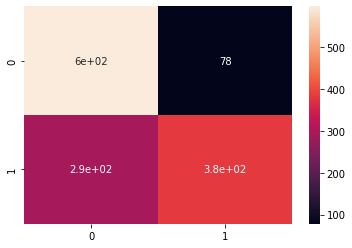

In [20]:
sns.heatmap(pd.DataFrame(confusion_matrix(true_labels, predictions), range(2), range(2)), annot=True)
plt.show()